In [9]:
import pandas as pd
import os
from rouge import Rouge
import matplotlib.pyplot as plt

In [4]:
homepath = os.getenv('LOCAL_ENV')
bart_summaries = pd.read_csv(homepath+'data/processed/summarisation_data/BART_google_summaries.csv')
text_rank_sumaries = pd.read_csv(homepath+'data/processed/summarisation_data/textrank_google_summaries.csv')

In [6]:
display(text_rank_sumaries)

,Unnamed: 0,target_text
0,8,We asked for a place by the window and that wa...
1,10,"Why is English spoken all the time, even thoug..."
2,23,"Nice pizzas, the owners is an italian who know..."
3,30,"Also good for takeaways when you're at uni, hi..."
4,39,"Maybe dinner also, but don't order any garlick..."
...,...,...
95,677,Blessed what a choice and when I return home I...
96,688,and super friendly service with attention !
97,693,"If you can leave the center, come eat here."
98,695,"Certain days in a week I eat vegan, and this w..."


In [8]:
rouge = Rouge()
google_eval = rouge.get_scores(bart_summaries['BART Summaries'].tolist(), text_rank_sumaries['target_text'].tolist(), avg=True, ignore_empty=True)

In [11]:
print(google_eval)

{'rouge-1': {'r': 0.4802715327096969, 'p': 0.5580906315906315, 'f': 0.5059395028528904}, 'rouge-2': {'r': 0.41866985574338517, 'p': 0.49811441336441326, 'f': 0.4431159178017585}, 'rouge-l': {'r': 0.4710857519871515, 'p': 0.5481046176046176, 'f': 0.4965568080891613}}


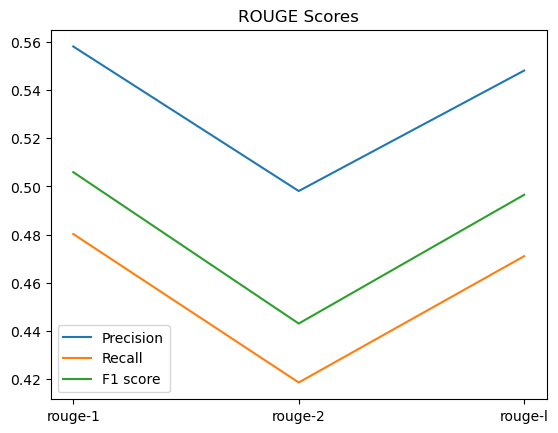

In [14]:
# Extract the ROUGE scores
metrics = ['rouge-1', 'rouge-2', 'rouge-l']
precision_scores = []
recall_scores = []
f1_scores = []

for metric in metrics:
    precision_scores.append(google_eval[metric]['p'])
    recall_scores.append(google_eval[metric]['r'])
    f1_scores.append(google_eval[metric]['f'])

x = range(len(metrics))

fig, ax = plt.subplots()
ax.plot(x, precision_scores, label='Precision')
ax.plot(x, recall_scores, label='Recall')
ax.plot(x, f1_scores, label='F1 score')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='best')
plt.title('ROUGE Scores')
plt.show()